### Text Preprocessing and Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,book_title,Book_series,book_rating,book_author,genre,reviewer_name,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",emma,202.\nThat’s the number of times that the word...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,"3.75 stars\n""Rhys stepped off the stairs and t...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Emily May,I wish so much that I could tell you I loved t...,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21559 entries, 0 to 21558
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   book_title     21559 non-null  object 
 1   Book_series    8780 non-null   object 
 2   book_rating    21559 non-null  float64
 3   book_author    21559 non-null  object 
 4   genre          21438 non-null  object 
 5   reviewer_name  21534 non-null  object 
 6   review         20817 non-null  object 
 7   ID             21559 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


In [3]:
df['review'] = df['review'].fillna('Missing')

#### Clean Raw Text Reviews:

In [4]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_html_urls_special(text):
    text = re.sub(r'<.*?>', '', str(text))  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text.lower()

# Remove HTML tags, URLs, and special characters and convert to lowercase
df['review_clean'] = df['review'].apply(remove_html_urls_special)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df.head()

,book_title,Book_series,book_rating,book_author,genre,reviewer_name,review,ID,review_clean
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",emma,202.\nThat’s the number of times that the word...,1,202\nthats the number of times that the word m...
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),I need a black silk robe and a balcony to wear...,2,i need a black silk robe and a balcony to wear...
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3,this book totally wrecked me in the best possi...
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,"3.75 stars\n""Rhys stepped off the stairs and t...",4,375 stars\nrhys stepped off the stairs and too...
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Emily May,I wish so much that I could tell you I loved t...,5,i wish so much that i could tell you i loved t...


#### Stopwords & Non-Alphabetic Removal:

In [6]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

df['review_clean'] = df['review_clean'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lemmatization/Stemming:

Stemming: (Faster)

- "running" → "run"

- "better" → "bet" 

Lemmatization: (accurate)

- "running" → "run"

- "better" → "good"

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize text
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize each word
    return " ".join(lemmatized_tokens)  # Reconstruct sentence
df['review_clean'] = df['review_clean'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Tokenization:


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Keep top 10k words, handle OOV
tokenizer.fit_on_texts(df['review_clean'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['review_clean'])
sequences = pad_sequences(sequences, padding='post')

### Exploratory Data Analysis (EDA)


#### Rating Distribution Analysis:


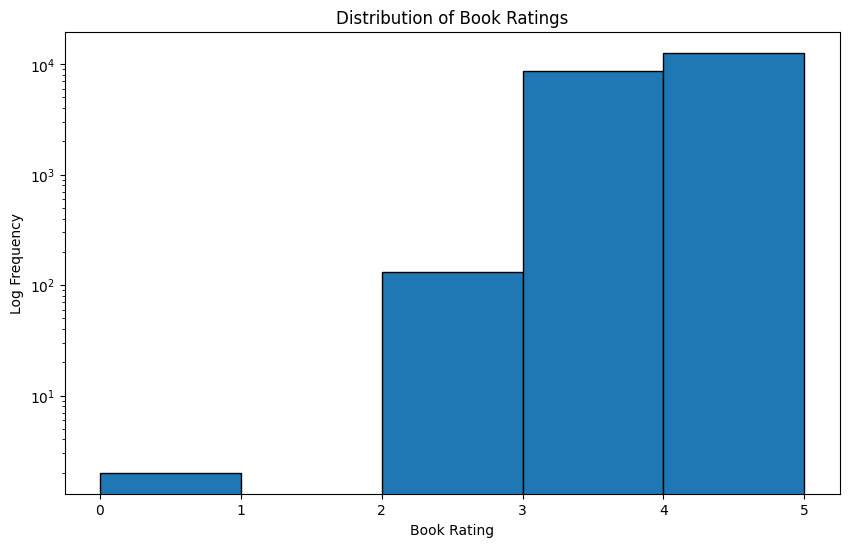

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['book_rating'], bins=5, edgecolor='black')
plt.xlabel('Book Rating')
plt.ylabel('Log Frequency')
plt.yscale('log')
plt.title('Distribution of Book Ratings')
plt.show()

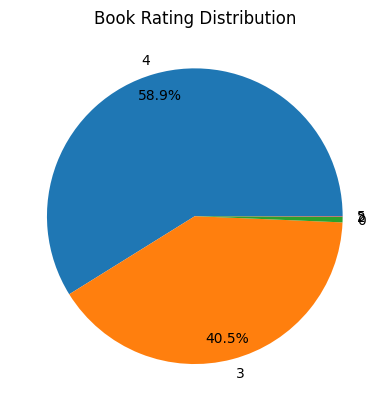

In [10]:
# Function to hide small percentages
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 5 else ''  # Hide if <5%

# Pie plot with conditional percentage display
plt.pie(
    df['book_rating'].apply(int).value_counts(), 
    labels=df['book_rating'].apply(int).unique(), 
    autopct=autopct_format,  # Apply conditional formatting
    pctdistance=0.85,  
    labeldistance=1.1
)

plt.title('Book Rating Distribution')
plt.show()


C:\Users\ahmad\AppData\Local\Temp\ipykernel_16352\2823581792.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['book_rating'], review_lengths, cmap='viridis', edgecolor='black')


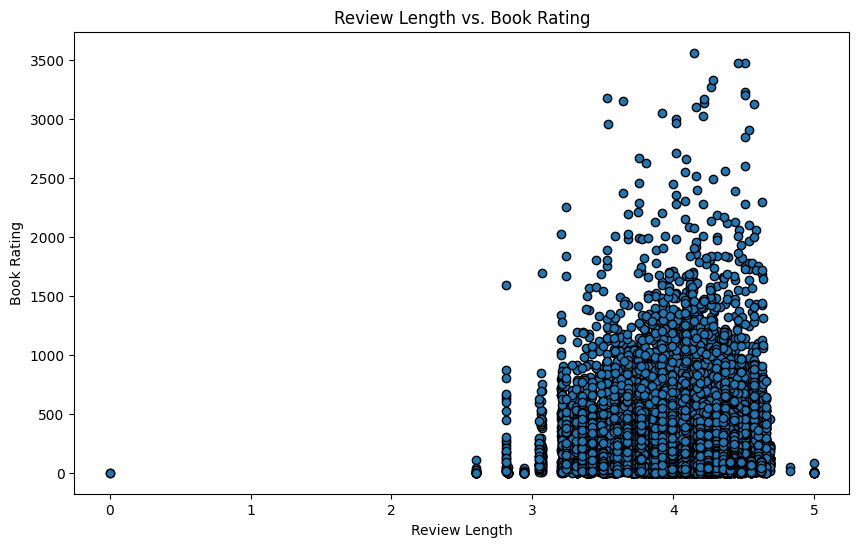

In [11]:
review_lengths = df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.scatter(df['book_rating'], review_lengths, cmap='viridis', edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Book Rating')
plt.title('Review Length vs. Book Rating')
plt.show()

#### Word Frequency Visualization

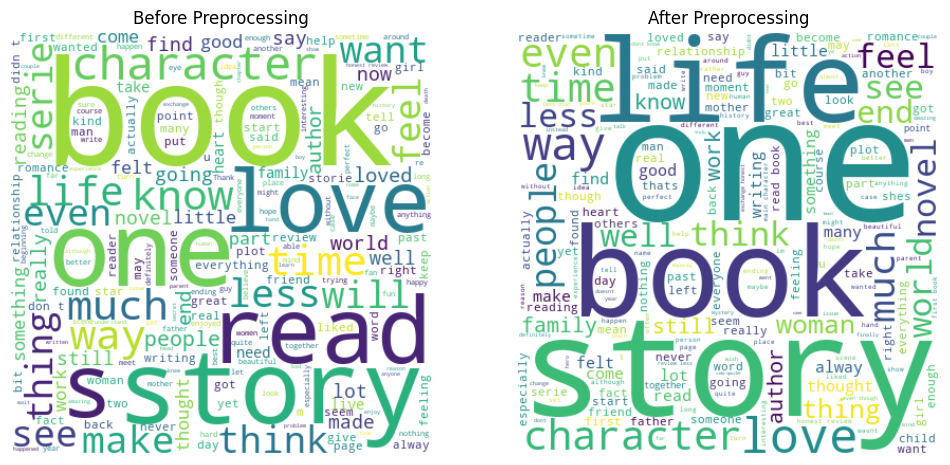

Ellipsis

In [12]:
from wordcloud import WordCloud

# Generate word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Word cloud before preprocessing
wordcloud_before = WordCloud(width=400, height=400, background_color='white').generate(" ".join(df['review']))
axes[0].imshow(wordcloud_before, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Before Preprocessing")

# Word cloud after preprocessing
wordcloud_after = WordCloud(width=400, height=400, background_color='white').generate(" ".join(df['review_clean']))
axes[1].imshow(wordcloud_after, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("After Preprocessing")

plt.show()
...

In [13]:
df[['review', 'review_clean']].head()

,review,review_clean
0,202.\nThat’s the number of times that the word...,202 thats number time word mate hellish form u...
1,I need a black silk robe and a balcony to wear...,need black silk robe balcony wear im gon na dr...
2,THIS BOOK TOTALLY WRECKED ME. In the best poss...,book totally wrecked best possible way im thri...
3,"3.75 stars\n""Rhys stepped off the stairs and t...",375 star rhys stepped stair took hand night tr...
4,I wish so much that I could tell you I loved t...,wish much could tell loved book didnt thinking...


### Word2Vec Training on Text Reviews

In [9]:
from gensim.models import Word2Vec
# Ensure sequences contain words, not integers
word_index = tokenizer.index_word  # Mapping from index to word
sentences = [[word_index[i] for i in seq if i in word_index] for seq in sequences]

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=sentences,  # List of tokenized sentences
    vector_size=100,   # Dimensionality of word vectors
    window=3,          # Context window size
    min_count=2,       # Minimum word occurrences
    sg=1               # 1 for skip-gram, 0 for CBOW
)

In [10]:
def get_doc_embedding(words, model):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Example: Get document embeddings for all reviews
doc_embeddings = np.array([get_doc_embedding(review, w2v_model) for review in df['review'].iloc[0:3]])

print(doc_embeddings.shape)  # (3, 100) → 3 reviews, 100-dimensional embeddings
doc_embeddings

(3, 100)


array([[-0.3828133 ,  0.4858642 ,  0.258478  ,  0.07432641, -0.38264588,
        -0.68923163,  0.06609228,  0.24873358, -0.36211994, -0.04715239,
         0.16655008, -0.11847045, -0.59768593,  0.18002899,  0.08831827,
        -0.3342682 ,  0.06835156, -0.22770374, -0.18099663, -0.16410725,
         0.13082123, -0.02425656,  0.32485643, -0.25010118,  0.13701892,
        -0.13317502,  0.06658946, -0.0279879 , -0.18054762,  0.11396009,
         0.05154721,  0.4315218 ,  0.02623976,  0.11530095, -0.11806671,
         0.64198124,  0.14057538, -0.36954272, -0.14014138, -0.13948488,
        -0.33270657, -0.1387588 , -0.33675218, -0.17496458, -0.1806844 ,
        -0.12560207, -0.00632516, -0.16220509, -0.35606012,  0.42567864,
        -0.1140094 , -0.06764263, -0.3643579 ,  0.09231282,  0.23970486,
        -0.09544483,  0.21904622, -0.18134338, -0.21466717,  0.25226346,
        -0.33825043,  0.29433027, -0.4217151 , -0.2715823 , -0.40523943,
         0.201191  ,  0.09951778,  0.06320375, -0.0

In [11]:
# Find similar words to "great", "character", and "smart"
similar_great = w2v_model.wv.most_similar("great", topn=5)
similar_character = w2v_model.wv.most_similar("character", topn=5)
similar_smart = w2v_model.wv.most_similar("smart", topn=5)

print("Words similar to 'great':", similar_great)
print("Words similar to 'character':", similar_character)
print("Words similar to 'smart':", similar_smart)


Words similar to 'great': [('fantastic', 0.8027325868606567), ('terrific', 0.7569496035575867), ('excellent', 0.7563367486000061), ('wonderful', 0.74343341588974), ('amazing', 0.7202668190002441)]
Words similar to 'character': [('protagonist', 0.7354019284248352), ('fleshed', 0.6829693913459778), ('characterization', 0.6824795007705688), ('welldrawn', 0.6797589659690857), ('dimensional', 0.6794584393501282)]
Words similar to 'smart': [('intelligent', 0.7908103466033936), ('resourceful', 0.7600317597389221), ('kickass', 0.7511408925056458), ('hardworking', 0.7440674304962158), ('feisty', 0.7426323890686035)]


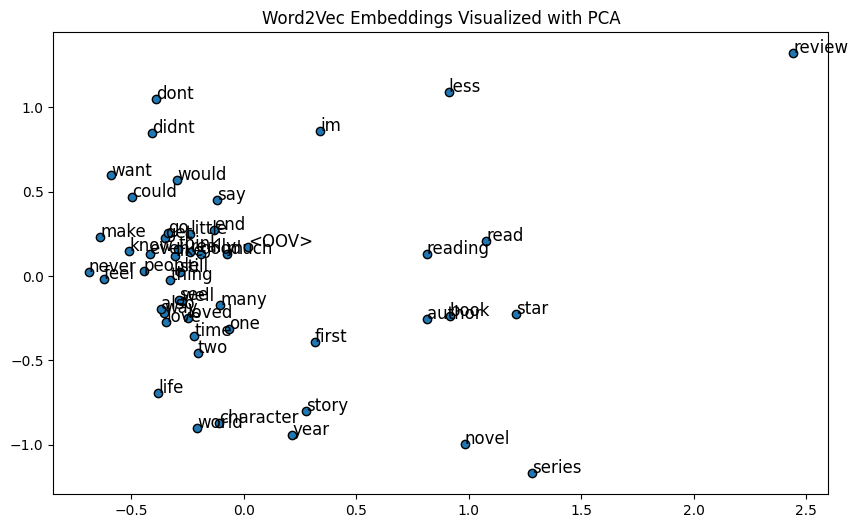

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get word vectors
words = list(w2v_model.wv.index_to_key)[:50]  # Select first 50 words
vectors = w2v_model.wv[words]

# Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k')

# Annotate points
for word, (x, y) in zip(words, reduced_vectors):
    plt.text(x, y, word, fontsize=12)

plt.title("Word2Vec Embeddings Visualized with PCA")
plt.show()


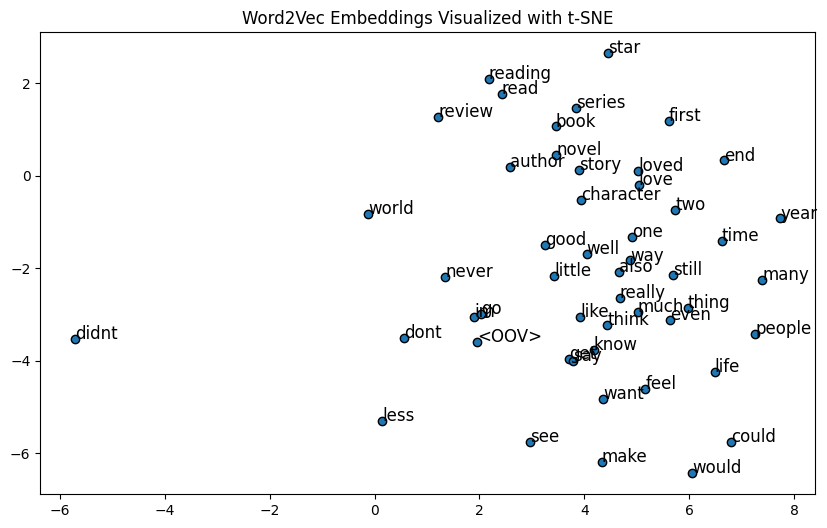

In [13]:
from sklearn.manifold import TSNE

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, perplexity=15, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k')

# Annotate points
for word, (x, y) in zip(words, reduced_vectors):
    plt.text(x, y, word, fontsize=12)

plt.title("Word2Vec Embeddings Visualized with t-SNE")
plt.show()


In [14]:
# save word2vec model
w2v_model.save("word2vec_model.model")

# save embeddings in csv
np.savetxt("word2vec_embeddings.csv", doc_embeddings, delimiter=",")